# Imports:

In [1]:
from pathlib import Path

from common import CosenoidSignal, Audio
from modulations import DSBSCModulatedSignal

AUDIO_PATH = Path(r'toy_train_whistle.wav')

# 4) Aplicação da modulação AM-DSB-SC acima para um sinal de áudio:

Sinal de áudio no tempo e na frequência:

In [2]:
INTERPOLATION_FACTOR = 10
train_whistle = Audio(AUDIO_PATH, INTERPOLATION_FACTOR)

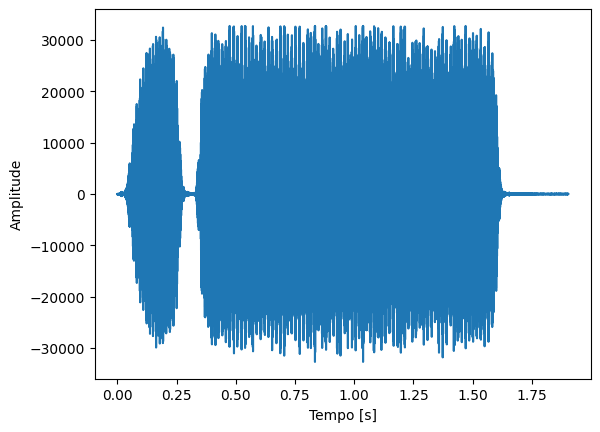

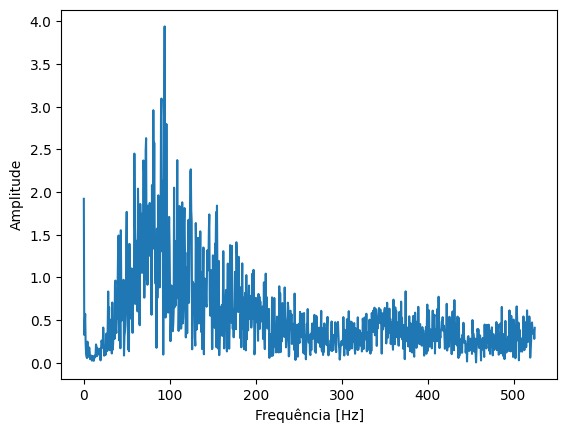

In [3]:
train_whistle.signal.plot_data(start_index=0, end_index=-1)
train_whistle.signal.plot_fourier(start_index=0, end_index=1000)

Sinal da portadora no tempo e na frequência:

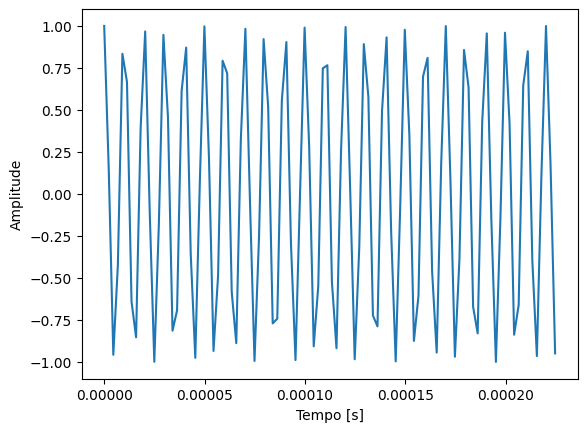

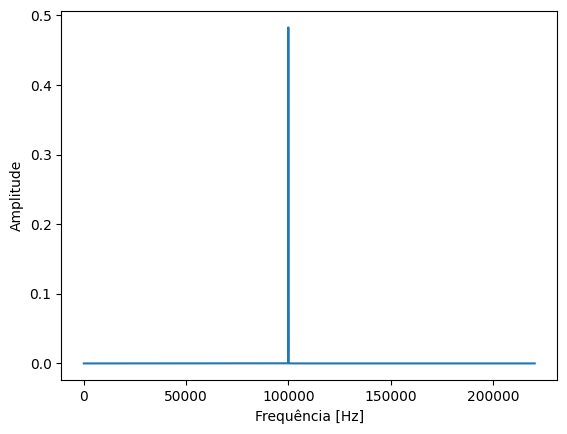

In [4]:
CARRIER_FREQUENCY = 100_000  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

train_carrier = CosenoidSignal(CARRIER_FREQUENCY,
                               train_whistle.signal.sample_rate,
                               train_whistle.signal.length,
                               amplitude=CARRIER_AMPLITUDE,
                               phase=CARRIER_PHASE)
train_carrier.signal.plot_data(start_index=0, end_index=100)
train_carrier.signal.plot_fourier(start_index=0, end_index=-1)

Sinal modulado no tempo e na frequência:

In [5]:
COHERENT_FILTER_ORDER = 7
COHERENT_CUTOFF_FREQUENCY = 15_000

modulated_whistle = DSBSCModulatedSignal(
    train_whistle, train_carrier,
    COHERENT_FILTER_ORDER, COHERENT_CUTOFF_FREQUENCY
    )

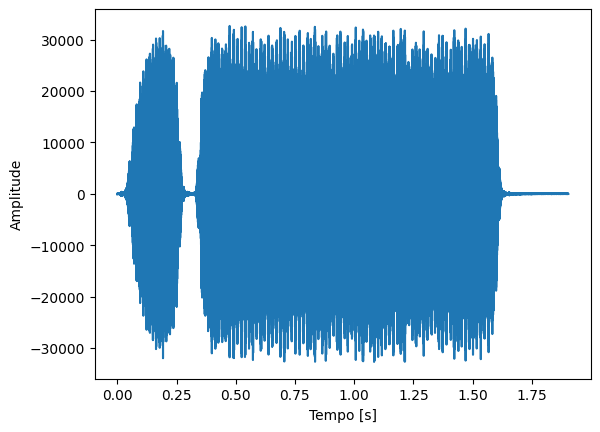

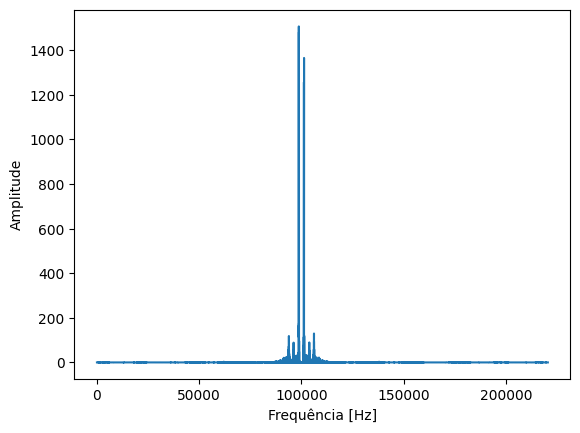

In [6]:
modulated_whistle.modulated.plot_data(start_index=0, end_index=-1)
modulated_whistle.modulated.plot_fourier(start_index=0, end_index=-1)

Demodulação coerente:

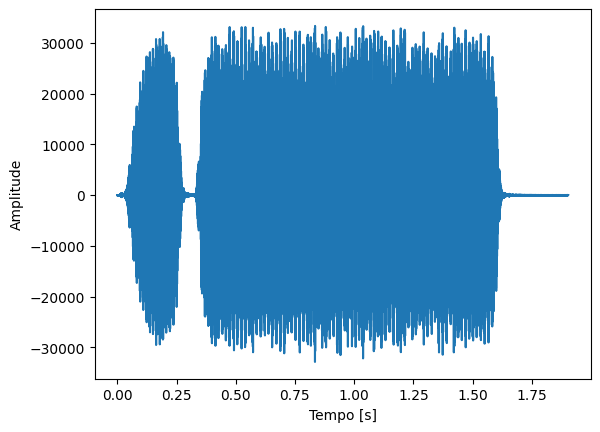

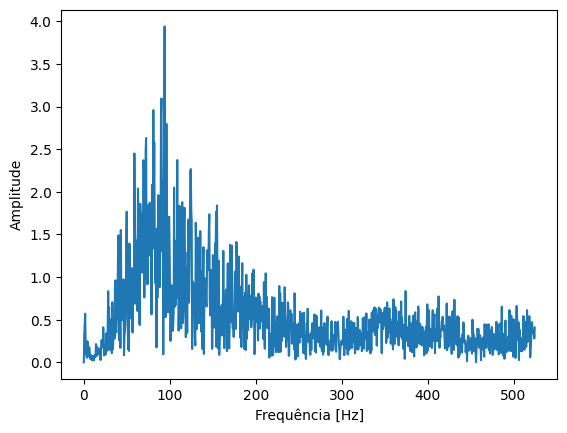

In [7]:
modulated_whistle.demodulated.plot_data(start_index=0, end_index=-1)
modulated_whistle.demodulated.plot_fourier(start_index=0, end_index=1000)

In [8]:
import IPython.display as IPydisp

data_array = modulated_whistle.demodulated.data_array
sample_rate = modulated_whistle.modulation.sample_rate
IPydisp.Audio(data_array, rate=sample_rate)